In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.externals import joblib

In [2]:
model = joblib.load("random_forest.model")

In [3]:
importances = model.feature_importances_

In [4]:
indices = np.argsort(importances)[::-1]

Importance threshold: 0.900000
Total importance: 0.900087
Number of features: 370
Parameter importance: [82, 68, 0, 62, 72, 84, 2]


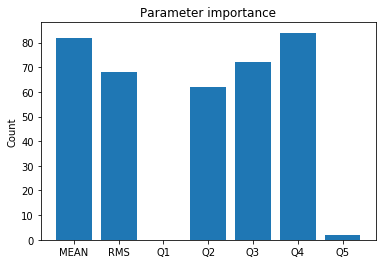


Importance threshold: 0.950000
Total importance: 0.950027
Number of features: 527
Parameter importance: [118, 98, 0, 88, 96, 120, 7]


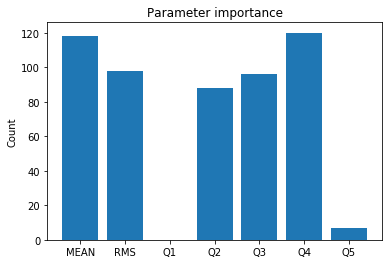


Importance threshold: 0.980000
Total importance: 0.980074
Number of features: 769
Parameter importance: [160, 148, 20, 117, 124, 162, 38]


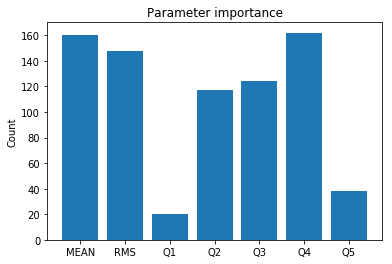


Importance threshold: 0.990000
Total importance: 0.990004
Number of features: 945
Parameter importance: [194, 185, 47, 134, 137, 185, 63]


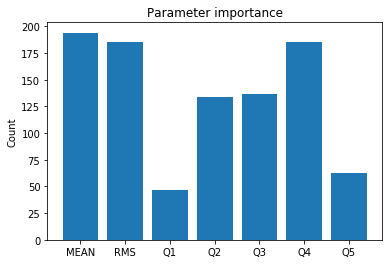


Importance threshold: 0.999000
Total importance: 0.999006
Number of features: 1335
Parameter importance: [240, 263, 124, 181, 174, 216, 137]


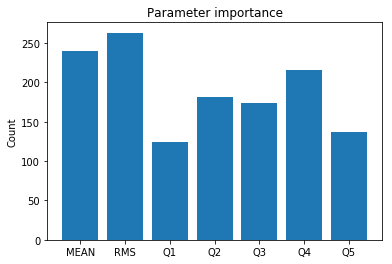


Total importance: 1.000000
Number of features: 2807
Parameter importance: [284, 294, 166, 207, 195, 236, 193]


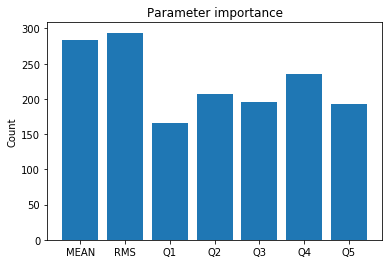

In [5]:
# For curiosity only - plot and print importance scores at these thresholds
importance_thresholds = [0.9, 0.95, 0.98, 0.99, 0.999, 1]

features_total = 2807

importance_total = 0
importance_y = []

# indices of zero importance features
indices_zero = [] 
parameters_zero = [0] * 7

# Each top-level feature is made of 7 parameters (MEAN, RMS, Q1, Q2, Q3, Q4, Q5)
# Idea is to find out which of these 7 parameters turns out to be most important
parameter_importances = [0] * 7

for f in range(features_total):
    indice = indices[f]
    importance = importances[indice]
    
    if importance == 0.0:
        indices_zero.append(indice)
        parameters_zero[indice % 7] += 1
    else:
        importance_total += importance
        parameter_importances[indice % 7] += 1
        
    # Integrated importance used for plotting
    importance_y.append(importance_total)
    
#     print("%d. feature %d (%f)" % (f + 1, indice, importance))
    if importance_thresholds or (f == (features_total-1)):
        
        if f == (features_total-1):
            pass
        elif importance_total < importance_thresholds[0]:
            continue
        else:
            print("Importance threshold: %f" % importance_thresholds[0])
            del importance_thresholds[0]
            
        print("Total importance: %f" % importance_total)
        print("Number of features: %d" % (f + 1))
        print("Parameter importance: %s" % parameter_importances)

        plt.figure()
        plt.bar(np.arange(7), parameter_importances)
        plt.xticks(np.arange(7), ("MEAN", "RMS", "Q1", "Q2", "Q3", "Q4", "Q5"))
        plt.title("Parameter importance")
        plt.ylabel("Count")
        plt.show()
            
        print()

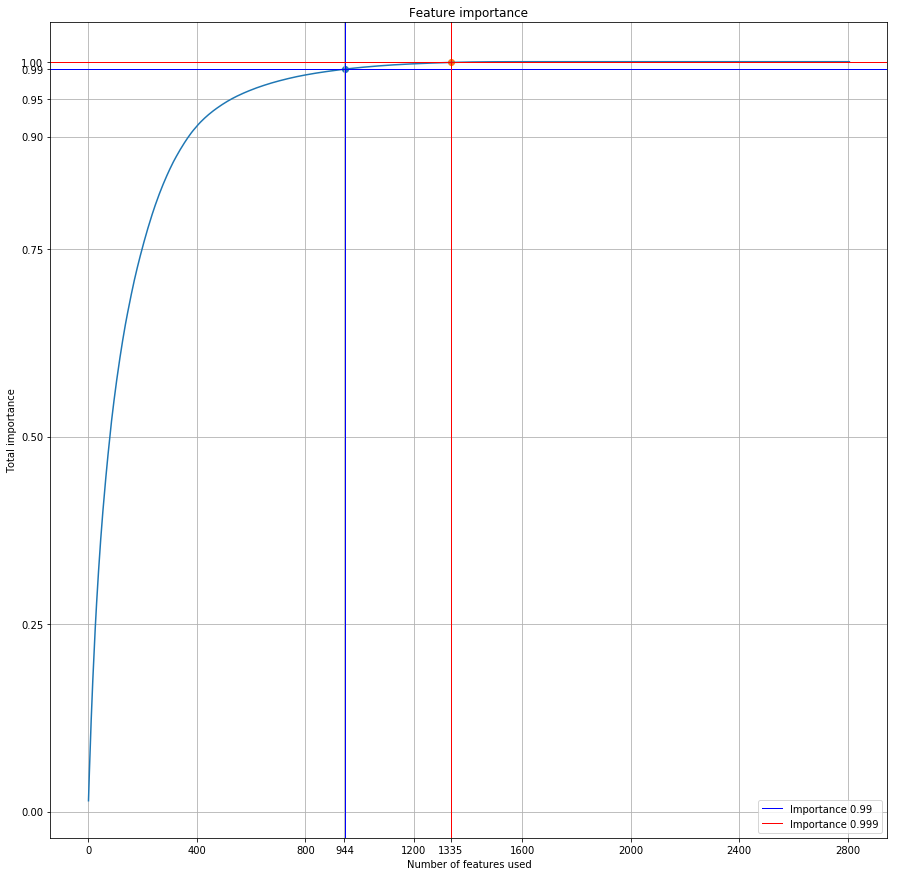

In [6]:
plt.figure(figsize=(15,15))
plt.grid()
plt.plot(np.arange(features_total), importance_y)

# importance 0.99
plt.scatter(945, 0.99, marker="o")
plt.axhline(y=0.99, color='b', linestyle='-', linewidth=1, label="Importance 0.99")
plt.axvline(x=945, color='b', linestyle='-', linewidth=1)

plt.scatter(1335, 0.999, marker="o")
plt.axhline(y=0.999, color='r', linestyle='-', linewidth=1, label="Importance 0.999")
plt.axvline(x=1335, color='r', linestyle='-', linewidth=1)

plt.title("Feature importance")
plt.ylabel("Total importance")
plt.xlabel("Number of features used")
plt.yticks([0,0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1])
xticks = np.append(np.arange(0, features_total, 400), [944, 1335])
plt.xticks(xticks)
plt.legend(loc="lower right")
plt.show()

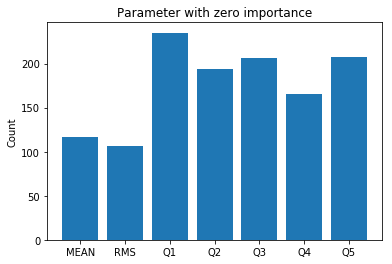

[9, 13, 16, 20, 21, 25, 27, 30, 37, 41, 55, 58, 66, 79, 84, 86, 90, 102, 107, 110, 111, 112, 114, 115, 117, 118, 122, 123, 127, 130, 132, 135, 137, 139, 143, 147, 160, 163, 170, 181, 187, 188, 190, 194, 196, 198, 205, 206, 208, 209, 213, 216, 219, 230, 231, 233, 234, 237, 238, 239, 240, 241, 242, 243, 244, 245, 249, 252, 256, 257, 261, 262, 265, 270, 271, 273, 275, 276, 279, 282, 283, 286, 289, 296, 300, 301, 303, 304, 310, 311, 314, 318, 319, 325, 328, 331, 333, 339, 340, 342, 343, 345, 347, 349, 351, 354, 362, 363, 364, 366, 367, 368, 372, 375, 378, 381, 382, 383, 386, 387, 389, 391, 392, 394, 395, 396, 397, 401, 405, 412, 422, 429, 436, 443, 444, 447, 448, 450, 454, 459, 462, 463, 464, 469, 475, 478, 486, 488, 489, 491, 492, 493, 494, 495, 496, 497, 498, 499, 501, 502, 503, 507, 508, 509, 510, 511, 512, 514, 515, 518, 521, 522, 523, 524, 526, 527, 531, 534, 539, 541, 542, 543, 545, 546, 548, 550, 554, 555, 556, 557, 559, 561, 562, 563, 564, 565, 566, 567, 570, 571, 572, 573, 577, 57

In [7]:
plt.figure()
plt.bar(np.arange(7), parameters_zero)
plt.xticks(np.arange(7), ("MEAN", "RMS", "Q1", "Q2", "Q3", "Q4", "Q5"))
plt.title("Parameter with zero importance")
plt.ylabel("Count")
plt.show()
print(sorted(indices_zero))